# Statistics, Probability and Noise
Statistics and probability are used in Digital Signal Processing to characterize signals and the processes that generate them. For example, a primary use of DSP is to reduce interference, noise, and other undesirable components in acquired data. These may be an inherent part of the signal being measured, arise from imperfections in the data acquisition system, or be introduced as an unavoidable byproduct of some DSP operation. Statistics and probability allow these disruptive features to be measured and classified.


## 1. Signal and Graph Terminology
A signal is a description of how one parameter depends on another parameter. When both parameters have a continuous range, we call this signals **continuous**, on the other hand, when both parameters have a quantized range we call these signals **discrete**. In this course we will focus on discrete signals.

To keep things general, we will simply label the horizontal axis: **sample number**. If this were a continuous signal, another label would have to be used, such as: time, distance, x, etc.

The type of parameter on the horizontal axis is the domain of the signal. Some common domains are: **time**, **frequency** and **spatial domain**. When we just refer to **sample number** we are usually referring to time domain.

The variable, $N$, is widely used in DSP to represent the total number of samples in a signal. Two notations for assigning sample numbers are commonly used. In the first notation, the sample indexes run from $1$ to $N$. In the second notation, the sample indexes run from $0$ to $N-1$. We will use the second notation since *Python* indexes start by $0$. *MATLAB* would be a good example of using the first notation.


## 2. Mean and Standard Deviation

The **mean** is the average value of a signal:

$$\mu = \frac{1}{N}\sum_{i=0}^{N-1}x[i]$$

The **standard deviation** measure how far the signal fluctuates from the mean:

$$\sigma = \sqrt{\frac{1}{N-1}\sum_{i=0}^{N-1}(x[i]-\mu)^2}$$

It is of special interest because it fits well with the physics of how signals operate. For example, when random noise signals combine in an electronic circuit, the resultant noise is equal to the combined power of the individual signals, not their combined amplitude.

The standard deviation, $\sigma$, is a measure of **how far** the signal fluctuates from the mean. The variance, $\sigma^2$, represents the **power** of this fluctuation.

By definition, the standard deviation only measures the AC portion of a signal, while the **rms** value measures both the AC and DC components. If a signal has no DC component, its rms value is identical to its standard deviation.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In the following part you will develop three functions called `mean`, `variance` and `std` which correspond to the mean, variance and standard deviation equations explained before.

In [50]:
def mean(x):
    """ 
    Function that calculates the mean of an input signal x.
  
    Parameters: 
    x (numpy array): Array of numbers representing the input signal.
  
    Returns: 
    float: Returns mean of a input signal x
    """
    N = x.shape[0]
    acc = 0
    
    # YOUR CODE HERE
     #for i in range (5)
        #print (i)
    
        
    for i in range (0,N):
        acc += x[i]
        
    mean = acc/N

    return mean

def variance(x):
    """ 
    Function that calculates the variance of an input signal x.
  
    Parameters: 
    x (numpy array): Array of numbers representing the input signal.
  
    Returns: 
    float: Returns variance of a input signal x
    """
    mu = mean(x)
    N = x.shape[0]
    acc = 0
    
    # YOUR CODE HERE
    
    a = 1/(N-1)
    
    for i in range (0,N):
        acc += (x[i]- mu)**2
    
    variance1 = acc*a
    
    return variance1

def std(x):
    """ 
    Function that calculates the standard deviation of an input signal x.
  
    Parameters: 
    x (numpy array): Array of numbers representing the input signal.
  
    Returns: 
    float: Returns standard deviation of a input signal x
    """
    
    
    
    # YOUR CODE HERE
    std1 = np.sqrt(variance(x))
    
    return std1

To test your code you will use a sine wave with unit amplitude and calculate the mean, standard deviation and variance of that signal and compare it with the knowledge you have about this type of signal.

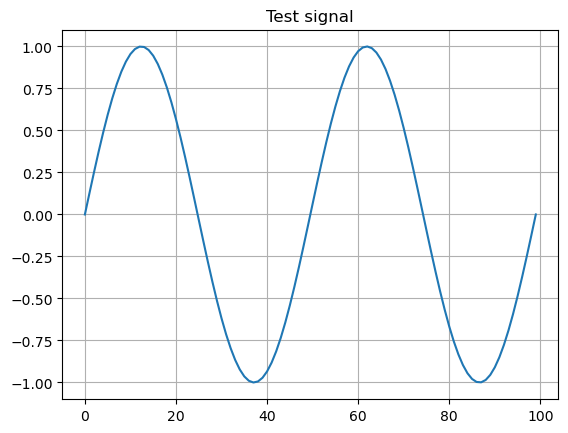

In [51]:
t = np.linspace(0,4*np.pi,100)
x = (np.sin(t)).reshape(-1,1)

plt.plot(x)
plt.title('Test signal')
plt.grid('on')
plt.show()

In [52]:
signal_mean = mean(x)
print('The mean of the signal is: {}'.format(signal_mean))
assert np.isclose(signal_mean, np.mean(x))

The mean of the signal is: [2.09140981e-17]


In [53]:
signal_std = std(x)
print('The standard deviation of the signal is: {}'.format(signal_std))
assert np.isclose(signal_std, np.std(x), rtol=1e-02)

The standard deviation of the signal is: [0.70710678]


In [54]:
signal_var = variance(x)
print('The variance of the signal is: {}'.format(signal_var))
assert np.isclose(signal_var, np.var(x), rtol=1e-01)

The variance of the signal is: [0.5]


## 3. Running Statistics
This method of calculating the mean and standard deviation is adequate for many applications; however, it has two limitations:

1. If the mean is much larger than the standard deviation, the equation involves subtracting two numbers that are very close in value. This can result in excessive round-off error in the calculations, 
2. It is often desirable to recalculate the mean and standard deviation as new samples are acquired and added to the signal. The previous equation, for calculating the standard deviation, requires that all of the samples be involved in each new calculation. This is a very inefficient use of computational power and memory.

A solution to these problems can be found by using the following equation:

$$\sigma^2=\frac{1}{N-1}\left[ \sum_{i=0}^{N-1}x[i]^2 - \frac{1}{N}\left(\sum_{i=0}^{N-1}x[i]\right){^2} \right]$$



Now you will implement a function called `running_statistics` which calculates the mean, variance and standard deviation of a signal using the previous equation.

In [55]:
def running_statistics(x):
    """ 
    Function that calculates the mean, variance and standard deviation 
    of an input signal x in a recurrent manner.
  
    Parameters: 
    x (numpy array): Array of numbers representing the input signal.
  
    Returns: 
    mean (float): Returns mean of a input signal x
    var (float): Returns variance of a input signal x
    std (float): Returns standard deviation of a input signal x
    """
    
    N = x.shape[0]
    
    b = 0
    acc = 0
    acc_of_squares = 0
    c = 0
    
    # YOUR CODE HERE
    
    b = (1/(N - 1))
    
    for i in range(0,N):
        acc_of_squares += x[i]**2
        acc += (x[i])
        
    c = 1/N
   

    mean = acc/N

    var = b*(acc_of_squares - c*(acc)**2)

    std = np.sqrt(var)        
        
    return mean, var, std

In [56]:
rs_signal_mean, rs_signal_var, rs_signal_std = running_statistics(x)

print('The mean of the signal is: {}'.format(rs_signal_mean))
print('The standard deviation of the signal is: {}'.format(rs_signal_std))
print('The variance of the signal is: {}'.format(rs_signal_var))

assert np.isclose(rs_signal_mean, np.mean(x))
assert np.isclose(rs_signal_var, np.var(x), rtol=1e-01)
assert np.isclose(rs_signal_std, np.std(x), rtol=1e-02)

The mean of the signal is: [2.09140981e-17]
The standard deviation of the signal is: [0.70710678]
The variance of the signal is: [0.5]


Although this new implementation can perform calculations of the mean, variance and standard deviation, the update problem is still present. To solve this issue we can create a class called `Running_Statistics` as follows:

In [57]:
class Running_Statistics():
    
    def __init__(self):
        self.acc = 0
        self.acc_of_squares = 0
        self.n = 0
        self.mean = 0
        self.var = 0
        self.std = 0
        return
        
    def update(self, x):
        """ 
        Function that updates the number of iterations, accumulator and sum of
        squares accumulator.

        Parameters: 
        x (numpy array): One dimensional array representing a input signal sample.

        Returns: 
        None
        """
        # YOUR CODE HERE
        self.n = self.n + 1
        self.acc = self.acc + x
        self.acc_of_squares = self.acc_of_squares + x**2
        return
    
    
    def calc(self, x):
        """ 
        Function that calculates the mean, variance and standard deviation 
        of an input signal sample.

        Parameters: 
        x (numpy array): One dimensional array representing a input signal sample.

        Returns: 
        mean (float): Returns mean of a input signal sample x
        var (float): Returns variance of a input signal sample x
        std (float): Returns standard deviation of a input signal sample x
        """
        # YOUR CODE HERE
        if (self.n>1):
                    self.mean= self.acc/self.n
                    self.var= (self.acc_of_squares - (((self.acc)**2)/self.n))/(self.n - 1)
                    self.std= np.sqrt(self.var)
        else:
                    self.mean= self.acc/self.n
                    self.var= ((self.acc_of_squares)**2)/self.n
                    self.std= np.sqrt(self.var)
        
        return self.mean, self.var, self.std
    
    
    def run(self,x):
        """ 
        Function that calculates first updates the number of iterations, accumulator 
        and sum of squares accumulator, and then calculates the mean, variance and 
        standard deviation of an input signal sample.

        Parameters: 
        x (numpy array): One dimensional array representing a input signal sample. 

        Returns: 
        mean (float): Returns mean of a input signal sample x
        var (float): Returns variance of a input signal sample x
        std (float): Returns standard deviation of a input signal sample x
        """
        # YOUR CODE HERE
        self.update(x)
        return self.calc(x)

Now we can calculate the statistics of a signal as data is being updated

In [58]:
N = x.shape[0]
statistics = Running_Statistics()

mean_acc = []
var_acc = []
std_acc = []

for i in range(N):
    mean_, var_, std_ = statistics.run(x[i][0])
    mean_acc.append(mean_)
    var_acc.append(var_)
    std_acc.append(std_)

In [59]:
with open('data.pkl', 'rb') as data:
    calc = pickle.load(data)

ref_mean_acc, ref_var_acc, ref_std_acc = calc

assert np.isclose(mean_acc, ref_mean_acc, rtol=1e-02).all()
assert np.isclose(var_acc, ref_var_acc, rtol=1e-02).all()
assert np.isclose(std_acc, ref_std_acc, rtol=1e-02).all()

You can also see the behavior of the statistics as it runs by time

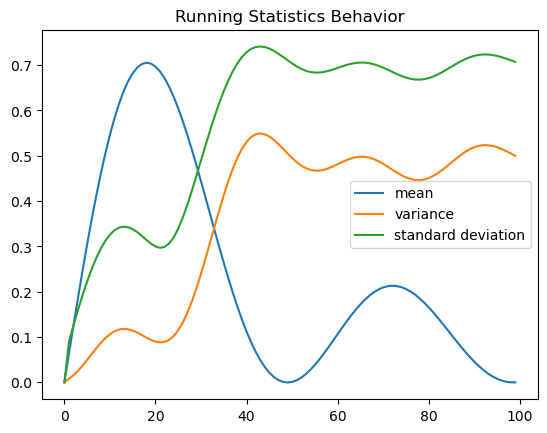

In [60]:
plt.plot(mean_acc, label='mean')
plt.plot(var_acc, label='variance')
plt.plot(std_acc, label='standard deviation')
plt.title('Running Statistics Behavior')
plt.legend();

In some situations, the mean describes what is being measured, while the standard deviation represents noise and other interference. In these cases, the standard deviation is not important in itself, but only in comparison to the mean. This gives rise to two concepts:

* **Signal to Noise Ratio (SNR)**: $$SNR=\frac{\mu}{\sigma}$$
* **Coefficient of variation (CV)**: $$CV = \frac{\sigma}{\mu}\times 100$$

Better data means a higher value for the SNR and a lower value for the CV.

## 4. Signal vs. Underlying Process
Statistics is the science of interpreting numerical data, such as acquired signals. In comparison, probability is used in DSP to understand the processes that generate signals.

The probabilities of the underlying process are constant, but the statistics of the acquired signal change each time the experiment is repeated. This random irregularity found in actual data is called by such names as: statistical variation, statistical fluctuation, and statistical noise.

This presents a bit of a dilemma. When you see the terms: mean and standard deviation, how do you know if the author is referring to the statistics of an actual signal, or the probabilities of the underlying process that created the signal? Unfortunately, the only way you can tell is by the context.

For random signals, the typical error between the mean of the $N$ points, and the mean of the underlying process, is given by:

$$error = \frac{\sigma}{\sqrt{N}}$$

If $N$ is small, the statistical noise in the calculated mean will be very large. In other words, you do not have access to enough data to properly characterize the process. The larger the value of $N$, the smaller the expected error will become. A milestone in probability theory, the **Strong Law of Large Numbers**, guarantees that the error becomes zero as $N$ approaches infinity.

### Standard Deviation Problem
Before you can calculate the standard deviation, you need to already know the mean, $\mu$. However, you don't know the mean of the underlying process, only the mean of the $N$ point signal, which contains an error due to statistical noise. This error tends to **reduce the calculated value of the standard deviation**. To compensate for this, $N$ is replaced by $N-1$. If $N$ is large, the difference doesn't matter. If $N$ is small, this replacement provides a more accurate estimate of the standard deviation of the underlying process.

In other words, we calculated an estimate of the standard deviation of the underlying process. If we divided by $N$ in the equation, it would provide the standard deviation of the acquired signal.

## 5. The Histogram and Probability Mass Function (PMF)
A histogram is an approximate representation of the distribution of numerical data. To construct a histogram, the first step is to "bin" or divide the entire range of values into a series of intervals and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins or intervals must be adjacent, and are often, but not required to be, of equal size.

In this part you will implement a function called `histogram` which calculates the histogram of a given signal using a ceiling rounding function.

In [70]:
def histogram(x, bins=100):
    """ 
    Function that calculates the histogram distribution of an input signal x.

    Parameters: 
    x (numpy array): Array of numbers representing the input signal.
    bins (int): Integer value representing the number of bins to use. Default 100.

    Returns: 
    numpy array: Returns histogram distribution of inputs signal x divided
    by the number of given bins.
    """
    
    N = x.shape[0]
    temp = np.zeros((bins+1,1))
    output = np.zeros((bins,1))
    
    # YOUR CODE HERE
    
    #definiendo las variables a utilizar
    limit = 0
    index = 0
    maxv = 0
    minv = 0
    
    for i in range (N):
        if x[i][0] > maxv:
                maxv = x[i][0]

        if x[i][0] < minv:
                minv = x[i][0]
            
    width = maxv - minv
    space = width/bins

    for i in range (N):
        limit = minv + space
        index = 0
        while x[i][0] > limit:
                limit = limit + space
                index = index + 1
        output[index][0] = output[index][0] + 1
    
    return output

Now test your `histogram` function and plot your results

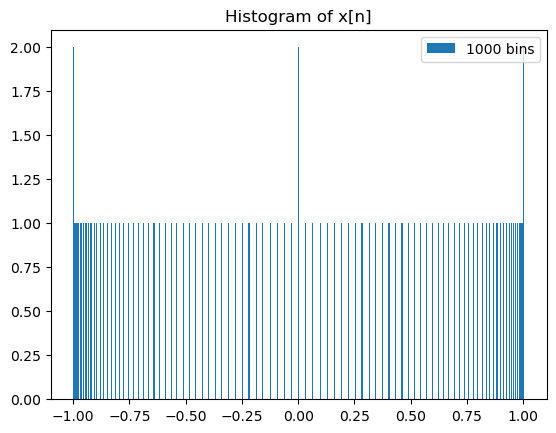

In [71]:
bins = 1000
hist = histogram(x,bins)
plt.bar(np.linspace(-1,1,bins),hist.flatten(), align='edge', width=0.005, label='{} bins'.format(bins))
plt.title('Histogram of x[n]')
plt.legend();

In [72]:
with open('histogram_picke.pkl', 'rb') as data:
    hist_pickle = pickle.load(data)
    
assert np.isclose(hist.reshape(-1), hist_pickle.reshape(-1)).all()

The notion that the acquired signal is a noisy version of the underlying process is very important; so important that some of the concepts are given different names. The histogram is what is formed from an acquired signal. The corresponding curve for the underlying process is called the probability mass function (PMF). A histogram is always calculated using a finite number of samples, while the PMF is what would be obtained with an infinite number of samples. The PMF can be estimated (inferred) from the histogram, or it may be deduced by some mathematical technique, such as the *kernel* density estimation.


The key to understanding these concepts rests in the units of the vertical axis. The vertical axis of the histogram is the number of times that a particular value occurs in the signal. The vertical axis of the PMF contains similar information, except expressed on a fractional basis. In other words, each value in the histogram is divided by the total number of samples to approximate the PMF.

### Kernel Density Estimation
In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. In some fields such as signal processing and econometrics it is also termed the Parzen–Rosenblatt window method, after Emanuel Parzen and Murray Rosenblatt, who are usually credited with independently creating it in its current form.

The idea behind the KDE is to find a density function, $\hat{f}$ such that

$$\widehat{f}_h(x) = \frac{1}{n}\sum_{i=1}^n K_h (x - x_i) = \frac{1}{nh} \sum_{i=1}^n K\Big(\frac{x-x_i}{h}\Big)$$

where:

* $K$ is the kernel function to use, in this case, a Gaussian distribution $$K(u) = \frac{1}{\sqrt{2\pi}}e^{\frac{-u^2}{2}}$$


* $h>0$ is a smoothing parameter, called the bandwidth, which by rule of thumb can be

$$h = \left(\frac{4}{3N}\right)^{1/5}\sigma$$

Implement a kernel density estimation function called `kde_estimation` that calculates a density function of a given input data. Use the auxiliary functions `phi`, `bandwidth`, and `kernel` to implement the Gaussian distribution, bandwidth, and kernel functions respectively.

In [80]:
def phi(x):
    """ 
    Function that calculates the Gaussian distribution of an input signal x.

    Parameters: 
    x (numpy array): Array of numbers representing the input signal.

    Returns: 
    numpy array: Returns Gaussian distribution of a given signal x.
    """
    
    # YOUR CODE HERE
    gaussianDist = 0
    denom = 0
    multp = 0
    
    denom = np.sqrt(2*pi())
    multp = (-(x)**2/2)
    
    gauusianDist = (1/denom)*multp
    
    return gaussianDist


def bandwidth(x):
    """ 
    Function that calculates the bandwidth of a kernel density estimation
    based on Silverman's Rule of Thumb.

    Parameters: 
    x (numpy array): Array of numbers representing the input signal.

    Returns: 
    float: Bandwidth of a kernel density estimation
    """
    
    N = x.shape[0]
    
    # YOUR CODE HERE
    h = 0
    multph = 4/(3*N)
    h = (multph**(1/5))*std(x)
    
    return h


def kernel(xi, x, h):
    """ 
    Function that implements the kernel density function estimation for a
    single input xi.

    Parameters: 
    xi (numpy array): One dimensional array to use for estimating the kernel.
    x (numpy array): Array representing a input signal.

    Returns: 
    float: Bandwidth of a kernel density estimation
    """
    
    # YOUR CODE HERE
    xi = 0
    
    u = (x-xi)/h
    k = phi(u)
    
    return(k)


def kde_estimation(x, x_lin=np.linspace(-2,2,1000).reshape(-1,1)):
    """ 
    Function that implements the kernel density function estimation of a given
    input signal x.

    Parameters: 
    x (numpy array): Array representing a input signal.
    h (float): Bandwidth of a kernel density estimation
    x_lin (numpy array): Array representing range of values used by the kde.

    Returns: 
    numpy array: Array that represents the kde estimation based on a Gaussian
    distribution and Silverman's Rule of Thumb bandwidth.
    """
    su = 0
    # YOUR CODE HERE
    for i in range (N):
        su=su + ((x[i]-x_lin[i])/h)*k
    
    ax=(1/(N*h)*(su))
    
    return ax

Calculate the PMF of the sine signal $x[n]$

In [82]:
bins = 100
hist = histogram(x,bins)
hist_freq = hist.reshape(-1)/x.shape[0]
hist_norm = hist_freq/hist_freq.max()

x_lin=np.linspace(-2,2,bins).reshape(-1,1)
pmf = kde_estimation(x, x_lin);

NameError: name 'h' is not defined

In [83]:
with open('pmf.pkl', 'rb') as file:
    pmf_pickle = pickle.load(file)
    
assert np.isclose(pmf_pickle, pmf).all()

NameError: name 'pmf' is not defined

NameError: name 'pmf' is not defined

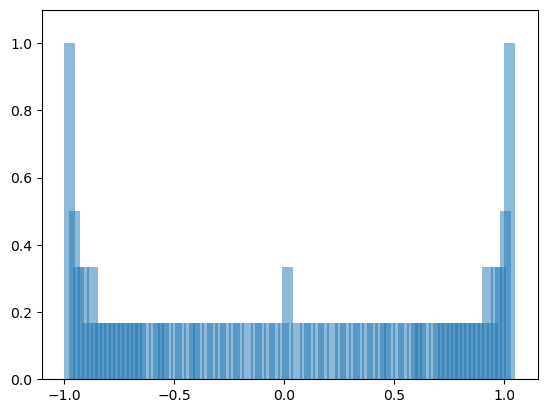

In [84]:
plt.ylim(0,1.1)
plt.bar(np.linspace(-1,1,bins),hist_norm, align='edge', width=0.05, alpha=0.5)
plt.plot(x_lin, pmf, c='orange', label='developed kde')
plt.title('Histogram and PMF of x[n]')
plt.legend();

Compare your `estimation` function with the `kde_scipy` function implemented in *SciPy*

In [85]:
from scipy.stats import gaussian_kde

def kde_scipy(x, x_lin, bandwidth=0.2, **kwargs):
    """
    Kernel Density Estimation using Scipy
    
    Parameters: 
    x (numpy array): Array representing a input signal.
    x_lin (numpy array): Array representing range of values used by the kde.

    Returns: 
    numpy array: Array that represents the kde estimation based on a Gaussian
    distribution and Silverman's Rule of Thumb bandwidth.
    """
    kde = gaussian_kde(x, bw_method='silverman', **kwargs)
    return kde.evaluate(x_lin)

NameError: name 'pmf' is not defined

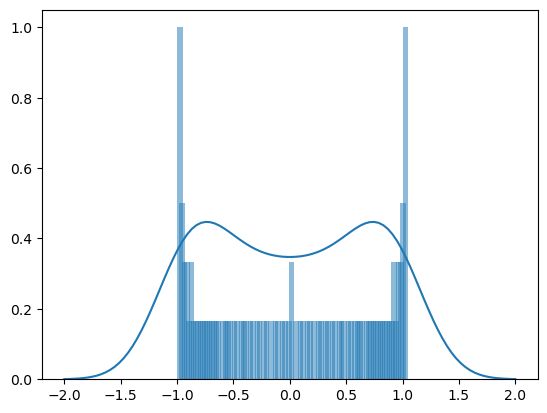

In [86]:
x_grid = np.linspace(-2,2,100)

plt.bar(np.linspace(-1,1,bins),hist_norm, align='edge', width=0.05, alpha=0.5);
plt.plot(x_grid,kde_scipy(x.T, x_grid), linestyle='-', label='scipy kde')
plt.plot(x_lin,pmf, linestyle='-.', label='developed kde')
plt.title('Histogram and PMF of x[n]')
plt.legend();

#### References:

http://www.dspguide.com/ch2.htm

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

https://en.wikipedia.org/wiki/Kernel_density_estimation

https://seaborn.pydata.org/tutorial/distributions.html